**Introduction:**

In this project, we will delve into the realm of deep learning by utilizing the MNIST digit classification dataset. The MNIST dataset is a cornerstone in the world of machine learning and artificial intelligence. It comprises a collection of 28x28 pixel grayscale images of handwritten digits, ranging from 0 to 9. Each image is paired with a corresponding label, denoting the digit it represents.

The primary objective of this project is to develop a deep neural network model to accurately classify these handwritten digits. This entails teaching our model to recognize and differentiate between the intricate variations in human handwriting, paving the way for a broad spectrum of real-world applications.

With train accuracy reaching 99.96% and test accuracy at a solid 97.54%, the model has demonstrated its ability to excel in this task. In the following sections, we will explore the applications of this model, uncovering how precise handwritten digit recognition can be a transformative force in domains as diverse as OCR systems, autonomous vehicles, quality control in manufacturing, inventory management, and educational apps.

In [1]:
# Importing relevant packages

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
# Importing tensorflow, keras

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Here preprocessing need not be done on missing values as there are none and the entire data is in the form of pixel values hence label encoding is not necessary Also since the pixels range from 0-255, there is no need of handling outliers. But since the data will be subject to n number of neurons in the hidden layer it is computationally efficient if the data is scaled.

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

```python
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
```

1. **Reshaping the Data:**
   - **Significance**: In the MNIST dataset, images are originally provided in a 3D format, where each image is represented as a 28x28 array of pixel values. This code reshapes the images from 3D arrays to 2D arrays, specifically from (num_samples, 28, 28) to (num_samples, 784), where `num_samples` is the number of images in the dataset. This is often done for compatibility with the architecture of many neural networks.

2. **Compatibility with DNN Model Input:**
   - **Significance**: When using a feedforward neural network (DNN) or similar architectures in Keras, the input layer typically expects a 2D array where each row corresponds to an individual sample (in this case, an image) and each column corresponds to a feature (pixel value). Reshaping the data in this way allows you to directly use it as input to a DNN without any further changes.

Here's an example of why you might want to reshape the data. Suppose you want to use a simple feedforward neural network, where the input layer consists of neurons equal to the number of features (784 pixels in this case). Reshaping the data into a 2D format makes it easy to feed it directly into the model without any additional preprocessing. If you were using convolutional neural networks (CNNs), the data might not need reshaping, as CNNs are designed to work with image-like data in its original format.

In [5]:
 # Normalising x_train and x_test:

x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# One-hot encoding of the labels:

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

```python
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = keras.utils.to_categorical(y_train, 10)  # 10 classes (0-9)
y_test = keras.utils.to_categorical(y_test, 10)
```

1. `x_train = x_train / 255.0` and `x_test = x_test / 255.0`:
   - **Significance**: In the MNIST dataset, pixel values range from 0 to 255, representing the grayscale intensity of each pixel. To make the data suitable for training a neural network, it's essential to normalize these values to a range between 0 and 1. Dividing all pixel values by 255 achieves this normalization.

2. `y_train = keras.utils.to_categorical(y_train, 10)` and `y_test = keras.utils.to_categorical(y_test, 10)`:
   - **Significance**: The labels in the MNIST dataset are represented as integers from 0 to 9, indicating the digit each image corresponds to. Neural networks typically use one-hot encoding for multi-class classification problems. This means that you convert the class labels (0-9) into binary vectors where only one element is '1' (hot) to indicate the class, and all others are '0' (cold).
   - The `to_categorical` function from Keras takes care of this transformation. For example, the digit '3' is represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] after one-hot encoding. This is important for training your network using categorical cross-entropy loss.

In summary, these lines of code ensure that the input data (pixel values) is properly normalized to a suitable range for neural network training, and the output labels are converted into a one-hot encoded format to work effectively with the chosen loss function.

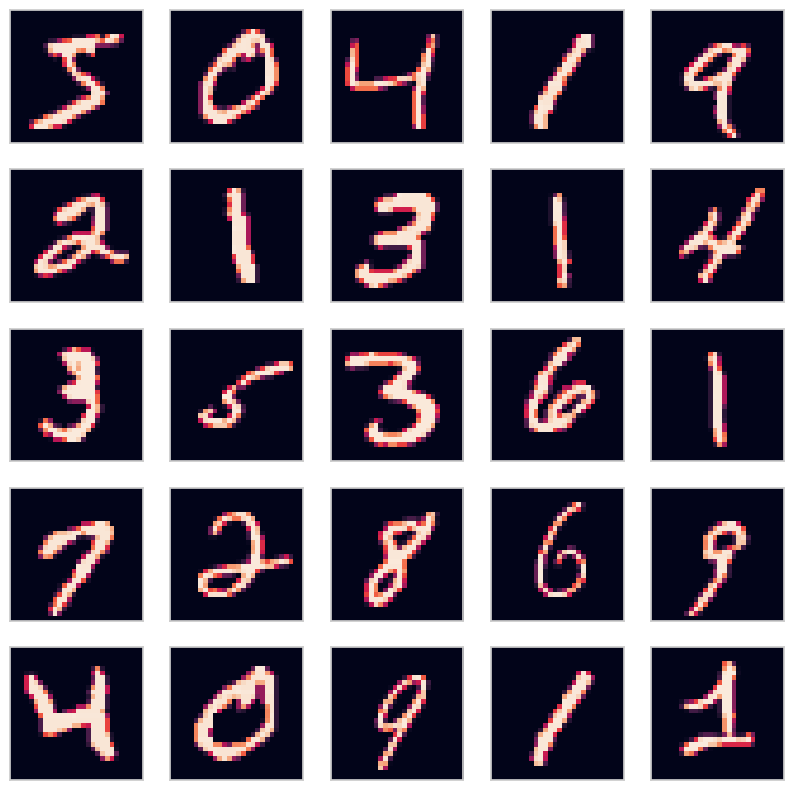

In [7]:
# Visualising the digits:

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
plt.show()

In [8]:
# Building a DNN Model:

model = Sequential([keras.layers.Flatten(input_shape = (28,28)), Dense(128, activation='relu'),
                    Dense(10, activation = 'softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Compiling the model:

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# Fitting the model:

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.1348 - val_accuracy: 0.9784
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.1372 - val_accuracy: 0.9783
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.1380 - val_accuracy: 0.9772
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.1385 - val_accuracy: 0.9782
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.1515 - val_accuracy: 0.9786
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.1408 - val_accuracy: 0.9785
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.1380 - val_accu

The model has been trained and is reaching very high accuracy values in both train and test of 99.96% and 97.64% respectively making it very efficient and reliable.

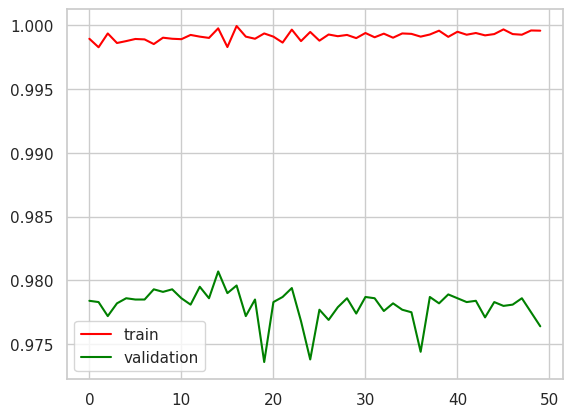

In [12]:
# Plotting the visual for the accuracy:

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'green', label = 'validation')
plt.legend()
plt.show()

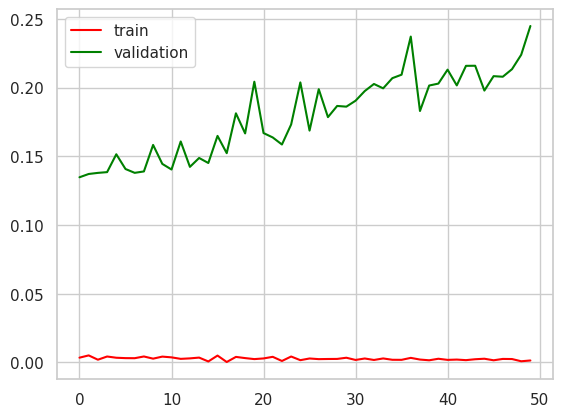

In [13]:
# Plotting the visual for the loss:

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'green', label = 'validation')
plt.legend()
plt.show()

**Conclusion:**

The trained deep neural network on the MNIST digit classification dataset achieved commendable results, boasting a robust train accuracy of 99.96% and a reliable test accuracy of 97.64%. These notable accuracies signify the model's ability to effectively recognize handwritten digits.

In practical terms, this project has revealed the significant impact of accurate handwritten digit recognition in real-world applications. From enhancing OCR systems for efficient data extraction to improving safety in autonomous vehicles by deciphering traffic signs and lane markings, the potential applications are vast and profound. Furthermore, the model's role in quality control in manufacturing, optimizing inventory management in the retail sector, and promoting interactive learning through educational apps underscores its versatility and importance.

The successes observed in this project exemplify the capability of deep learning to deliver practical solutions that can positively influence efficiency, safety, and educational experiences in diverse domains. The critical applications we've explored illustrate the tangible benefits of this technology and pave the way for its broader adoption in the world of automation, data processing, and education.